## **梯度下降法**

**梯度下降**(gradient_descent): 是一种常见的一阶优化方法, 是求解无约束优化问题最简单最经典的方法之一, 是一种迭代算法, 基本思路就是先选取一个适当的初始值seta0, 然后沿着梯度方向或者负梯度方向不断的迭代更新参数, 最终取得函数极小值.

- **梯度方向**: 变量当前沿此方向函数的增长最快
- **负梯度方向**: 变量当前沿此方向函数的减少最快

因为**损失函数**是关于参数seta的函数, 那么seta沿着负梯度方向变化, 此时损失函数减小的最快, 损失函数可以以最快的速度下降到极小值.

**数学公式**:

$$
\theta_{k+1} = \theta_k - \alpha \cdot \nabla L(\theta_k)
$$

$\theta_k$: 参数seta的初始值或者上一次迭代的参数值

$\alpha$: 步长, 规定了每次沿着梯度方向的移动距离, 称其为**学习率**, 是一个常见的超参数, 需要手动设置, 设置不当可能会导致无法收敛

$\nabla L(\theta_k)$: 损失函数的梯度向量, 是一个方向向量, 沿着这个方向走$\alpha$步长

其中梯度代入的是一个平均梯度: $\nabla L(\theta) = \frac{1}{n} \sum_{i=1}^{n} \nabla L_i(\theta)$

梯度下降算法的特点:
1. 梯度下降不一定可以找到全局的最优解, 有可能是一个局部最优解
2. 适用性广, 计算简单
3. 收敛速度慢, 可能陷入局部最优解

**具体分类**

1. 批量梯度下降(Batch Gradient Descent, BGD): 每次迭代使用全部的训练数据来计算梯度, 稳定收敛, 但是计算开销大

2. 随机梯度下降(Stochastic Gradient Descent, SGD): 每次迭代随机选取一个样本来计算梯度, 更新方向不稳定, 震荡过大容易造成无法收敛

3. 小批量梯度下降(Mini-Batch Gradient Descent, MBGD): 每次迭代使用一部分的训练数据来计算梯度(32, 64), 中和了BGD和SGD, 是常用的办法

#### **1. 数学简单案例演示梯度下降算法: 利用梯度下降法求解 f(x) = x^2 极小值点**

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 定义目标函数
def f(x):
    return x ** 2

In [4]:
# 定义梯度函数
def df(x):
    return 2 * x

In [5]:
# 定义超参数alph, 参数初始值x
alph = 0.1
x = 1

In [6]:
# 定义迭代结果
x_list = []
y_list = []

In [12]:
for i in range(10000):
    y = f(x)
    print(f'第{i}次迭代: x = {x}, f(x) = {y}')
    x_list.append(x)
    y_list.append(y)
    x = x - alph * df(x)

第0次迭代: x = 2.506026684677328e-107, f(x) = 6.2801697443148405e-214
第1次迭代: x = 2.0048213477418625e-107, f(x) = 4.019308636361498e-214
第2次迭代: x = 1.60385707819349e-107, f(x) = 2.5723575272713584e-214
第3次迭代: x = 1.283085662554792e-107, f(x) = 1.6463088174536695e-214
第4次迭代: x = 1.0264685300438336e-107, f(x) = 1.0536376431703485e-214
第5次迭代: x = 8.211748240350668e-108, f(x) = 6.743280916290229e-215
第6次迭代: x = 6.569398592280534e-108, f(x) = 4.3156997864257464e-215
第7次迭代: x = 5.255518873824427e-108, f(x) = 2.7620478633124775e-215
第8次迭代: x = 4.204415099059542e-108, f(x) = 1.767710632519986e-215
第9次迭代: x = 3.3635320792476334e-108, f(x) = 1.1313348048127908e-215
第10次迭代: x = 2.6908256633981066e-108, f(x) = 7.24054275080186e-216
第11次迭代: x = 2.1526605307184853e-108, f(x) = 4.6339473605131905e-216
第12次迭代: x = 1.7221284245747883e-108, f(x) = 2.9657263107284424e-216
第13次迭代: x = 1.3777027396598306e-108, f(x) = 1.898064838866203e-216
第14次迭代: x = 1.1021621917278646e-108, f(x) = 1.2147614968743702e-216
第15次

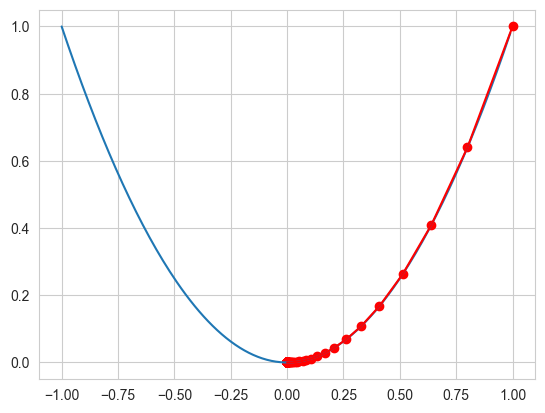

In [13]:
# 画出函数图像
x_plot = np.arange(-1, 1, 0.01)
plt.plot(x_plot, f(x_plot))
plt.plot(x_list, y_list, c='r')
plt.scatter(x_list, y_list, c='r')
plt.show()

#### **2. 数学复杂案例展示梯度下降法求解f(x) = x^2, 在x为何值时f(x) = 2**

可知目标函数: J(x) = (x^2 - 2)^2

In [51]:
# 目标函数
def J(x):
    return (x ** 2 - 2) ** 2
# 损失函数
def gradient(x):
    return 4 * x ** 3 - 8 * x

In [52]:
# 记录迭代路径
x_list_2 = []
y_list_2 = []

In [53]:
# 定义学习率和初始点
alph = 0.1
x = 1

In [54]:
while np.abs(grad := gradient(x)) > 1e-10:
    y = J(x)
    x_list_2.append(x)
    y_list_2.append(y)
    print(f'x = {x}, J(x) = {y}')
    x = x - alph * grad
print(len(x_list_2))

x = 1, J(x) = 1
x = 1.4, J(x) = 0.0016000000000000207
x = 1.4224, J(x) = 0.0005392501374976093
x = 1.4091877474304, J(x) = 0.00020135304893551616
x = 1.4171862364852523, J(x) = 7.084300844963512e-05
x = 1.4124149508659842, J(x) = 2.5847122806236675e-05
x = 1.415287241622027, J(x) = 9.22929998773163e-06
x = 1.4135673979840147, J(x) = 3.338701342062171e-06
x = 1.414600552545239, J(x) = 1.1984190188213448e-06
x = 1.4139811140931138, J(x) = 4.32186577498859e-07
x = 1.4143529396504189, J(x) = 1.554235200471605e-07
x = 1.4141299030385595, J(x) = 5.59877618758702e-08
x = 1.4142637460965501, J(x) = 2.0147963735112437e-08
x = 1.4141834478650945, J(x) = 7.254914247026955e-09
x = 1.4142316295388737, J(x) = 2.611413195736911e-09
x = 1.4142027215196682, J(x) = 9.401856170091332e-10
x = 1.4142200666857065, J(x) = 3.3845021699891026e-10
x = 1.4142096597137321, J(x) = 1.2184566457726578e-10
x = 1.4142159039428654, J(x) = 4.386366454390472e-11
x = 1.414212157421928, J(x) = 1.5791086568392545e-11
x = 1.

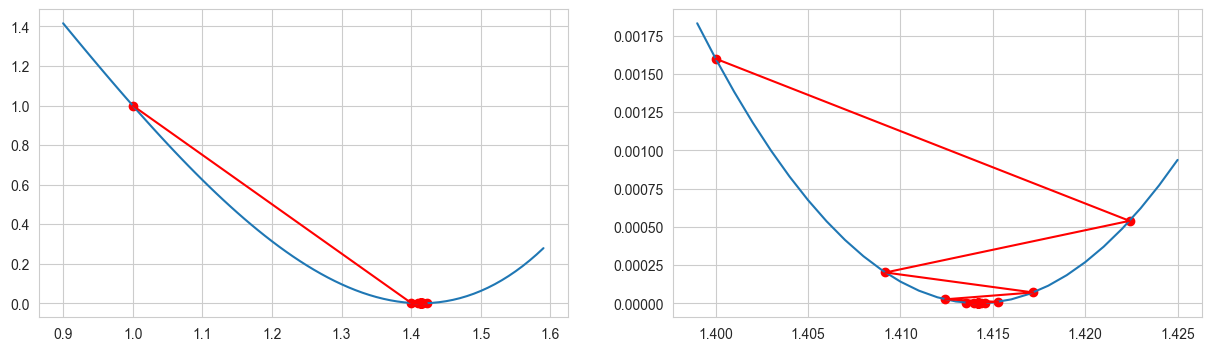

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
x = np.arange(0.9, 1.6, 0.01)
ax[0].plot(x, J(x))
ax[0].plot(x_list_2, y_list_2, c='r')
ax[0].scatter(x_list_2, y_list_2, c='r')

x = np.arange(1.399, 1.425, 0.001)
x_list_2 = x_list_2[1:]
y_list_2 = y_list_2[1:]
ax[1].plot(x, J(x))
ax[1].plot(x_list_2, y_list_2, c='r')
ax[1].scatter(x_list_2, y_list_2, c='r')
plt.show()

#### **使用梯度下降求解Loss函数取得极小值问题**

其中分为L1, L2两个正则化情况, Loss函数都是带有正则化项的情况


#### **1. L1正则化(Lasso)**

$$
\text{Loss}_{L1} = \frac{1}{n} \left( \sum_{i=1}^{n} \left( f(x_i) - y_i \right)^2 + \lambda \sum_{j=1}^{k} |w_j| \right)
$$

**对\( w_j \) 梯度**

$$
\frac{\partial \text{Loss}_{L1}}{\partial w_j} = \frac{1}{n} \left( 2 \sum_{i=1}^{n} x_{ij} \left( f(x_i) - y_i \right) + \lambda \cdot \text{sign}(w_j) \right)
$$

$$
\text{sign}(w_j) =
\begin{cases}
1, & \text{if } w_j > 0 \\
0, & \text{if } w_j = 0 \\
-1, & \text{if } w_j < 0
\end{cases}
$$

**参数更新策略**

$$
w_j \leftarrow w_j - \alpha \left( \frac{2}{n} \sum_{i=1}^{n} x_{ij} \left( f(x_i) - y_i \right) + \frac{\lambda}{n} \cdot \text{sign}(w_j) \right)
$$

**由此可知**

Lasso回归会惩罚模型中较大的系数甚至会完全忽略一些特征

### **2. L2正则化(Ridge)**

$$
\text{Loss}_{L2} = \frac{1}{n} \left( \sum_{i=1}^{n} \left( f(x_i) - y_i \right)^2 + \lambda \sum_{j=1}^{k} \omega_j^2 \right)
$$

**对\( w_j \) 梯度**

$$
\frac{\partial \text{Loss}_{L2}}{\partial \omega_j} = \frac{1}{n} \left( 2 \sum_{i=1}^{n} x_{ij} \left( f(x_i) - y_i \right) + 2\lambda \omega_j \right)
$$

**参数更新策略**

$$
\omega_j \leftarrow \omega_j - \alpha \left( \frac{2}{n} \sum_{i=1}^{n} x_{ij} \left( f(x_i) - y_i \right) + \frac{2\lambda}{n} \omega_j \right)
$$

**由此可知**

Ridge回归会惩罚模型中较大的系数, 但不会忽略任何特征